In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [9]:
len(X_test)
X_test=X_test/255
X_train=X_train/255

In [10]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train.shape

(60000, 28, 28)

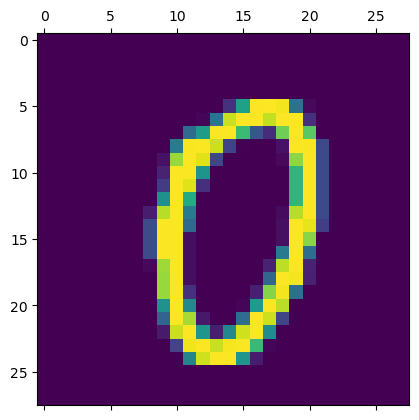

In [12]:
plt.matshow(X_train[1000])

In [13]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
# Y_train_flatten=Y_train.reshape(len(Y_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
# Y_test_flatten=Y_test.reshape(len(Y_test),28*28)

In [14]:
X_train_flattened.shape

(60000, 784)

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.4703 - accuracy: 0.8761
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3038 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2617 - accuracy: 0.9276
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2555 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2532 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.25

In [21]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.9272


[0.2658054828643799, 0.9272000193595886]

In [22]:
y_pre=model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


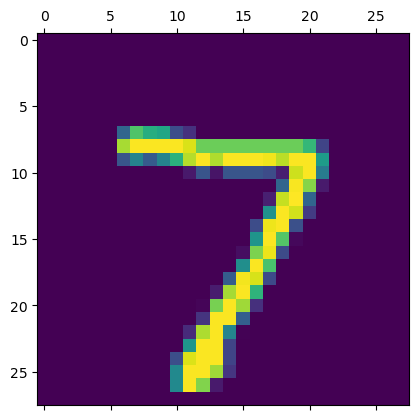

In [23]:
#It consists the number 7
plt.matshow(X_test[0])

In [24]:
#And predict one also the 7 
np.argmax(y_pre[0])

7

In [25]:
y_predicted_th=[np.argmax(i) for i in y_pre]
y_predicted_th[:5]

[7, 2, 1, 0, 4]

In [26]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_th)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1113,    4,    2,    0,    1,    4,    2,    9,    0],
       [   4,    8,  951,    9,    7,    4,   11,    8,   26,    4],
       [   5,    0,   24,  910,    0,   34,    4,   11,   16,    6],
       [   1,    1,    9,    2,  901,    0,   12,    5,    9,   42],
       [  10,    2,    4,   26,    7,  796,   17,    5,   23,    2],
       [  11,    3,   10,    1,    7,    9,  916,    1,    0,    0],
       [   1,    6,   25,    7,    4,    1,    0,  945,    4,   35],
       [   7,   10,   10,   24,    8,   36,   12,    8,  851,    8],
       [  11,    8,    1,   10,   19,    8,    0,   19,    5,  928]])>

Text(95.72222222222221, 0.5, 'Truth')

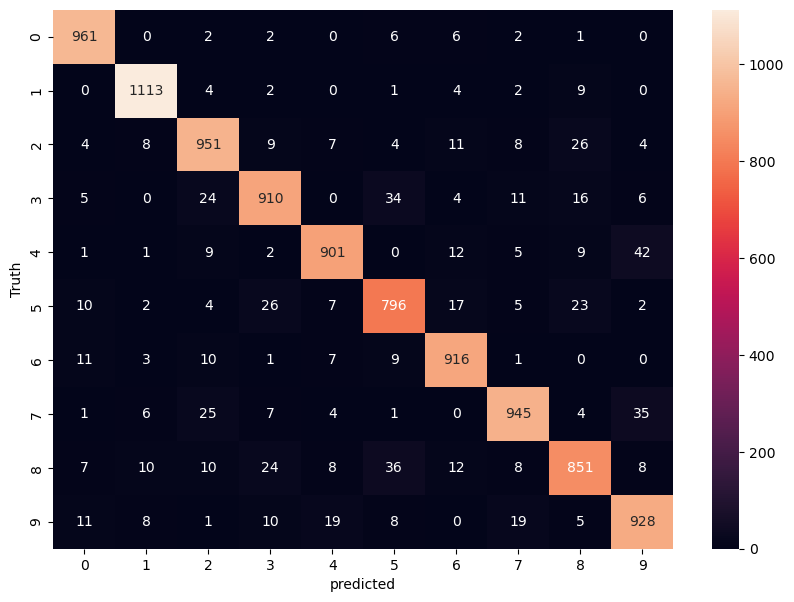

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [28]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 5ms/step - loss: 0.2750 - accuracy: 0.9224
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1255 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0883 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0670 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0534 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0422 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0

In [29]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0743 - accuracy: 0.9801


[0.07427535951137543, 0.9800999760627747]

Text(95.72222222222221, 0.5, 'Truth')

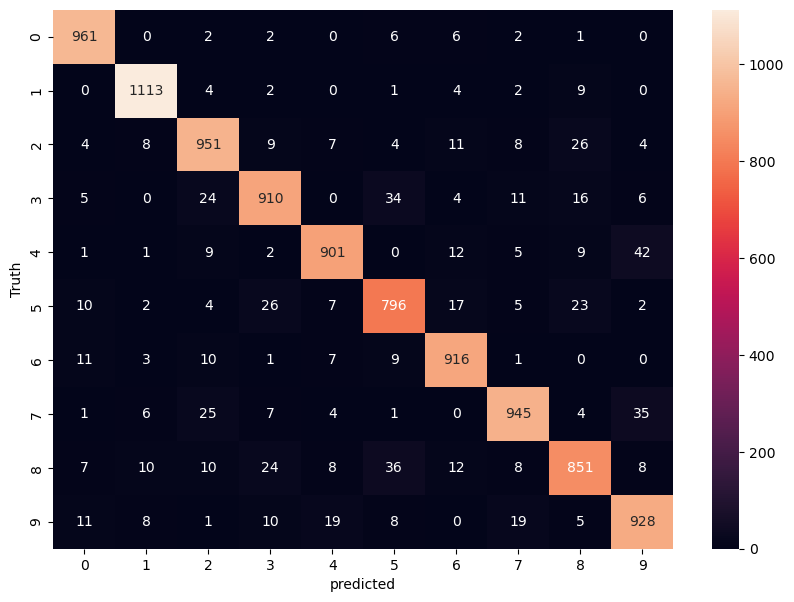

In [30]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [31]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2812 - accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1284 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0879 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0414 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0

In [36]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,input_shape=(784,),activation='tanh'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 20ms/step - loss: 20.2813 - accuracy: 0.1114
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 20.2774 - accuracy: 0.1247
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 20.2774 - accuracy: 0.1147
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 20.2774 - accuracy: 0.1089
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 20.2774 - accuracy: 0.1050
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 20.2774 - accuracy: 0.1030
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 20.2774 - accuracy: 0.1019
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 20.2774 - accuracy: 0.1013
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 20.2774 - accuracy: 0.1010
Epoch 10/10
1875/1875 [==============================] 